In [ ]:
from IPython.display import display
import pandas as pd
data = pd.read_csv('/data/data_pre_BTL.csv')
display(data.head(5))

,datetime,temp,dewpoint,maxtemp,mintemp,precipitation,humidity,windspeed,winddeg
0,1/1/2023,14.16,9.77,19.33,9.40,0.010,76.24,1.82,24.4
1,1/2/2023,14.27,11.14,18.47,9.99,0.730,82.32,2.55,44.3
2,1/3/2023,14.76,9.85,18.88,10.95,0.130,73.39,2.07,27.7
3,1/4/2023,15.89,12.86,20.89,12.52,0.625,83.76,1.77,118.7
4,1/5/2023,17.14,14.35,21.10,13.35,0.625,84.15,2.28,42.7


In [ ]:
df_normal = pd.read_csv('/data/datanormal_mintemp_BTL.csv')
display(df_normal)

,mintemp,temp,dewpoint,maxtemp
0,0.244596,0.276152,0.299203,0.280184
1,0.268215,0.280561,0.353785,0.251969
2,0.306645,0.300200,0.302390,0.265420
3,0.369496,0.345491,0.422311,0.331365
4,0.402722,0.395591,0.481673,0.338255
...,...,...,...,...
887,0.911529,0.874549,0.966135,0.756562
888,0.941553,0.890581,0.987251,0.761155
889,0.951161,0.881764,0.994422,0.722441
890,0.902722,0.824449,0.948207,0.604003


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Chọn đặc trưng và biến mục tiêu
features = ['mintemp','temp','dewpoint','maxtemp']

data_features = df_normal[features].values

# Chọn window
window_size = 9
X_train, y_train = [], []

for i in range(len(data_features) - window_size):
    X_train.append(data_features[i:i + window_size])
    y_train.append(data_features[i + window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape dữ liệu cho mô hình LSTM
X_train = X_train.reshape((X_train.shape[0], window_size, X_train.shape[2]))

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(24))
model.add(Dense(len(features)))
model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,164 (465.48 KB)

 Trainable params: 119,164 (465.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1442
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0165
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0153
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0143
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0123
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

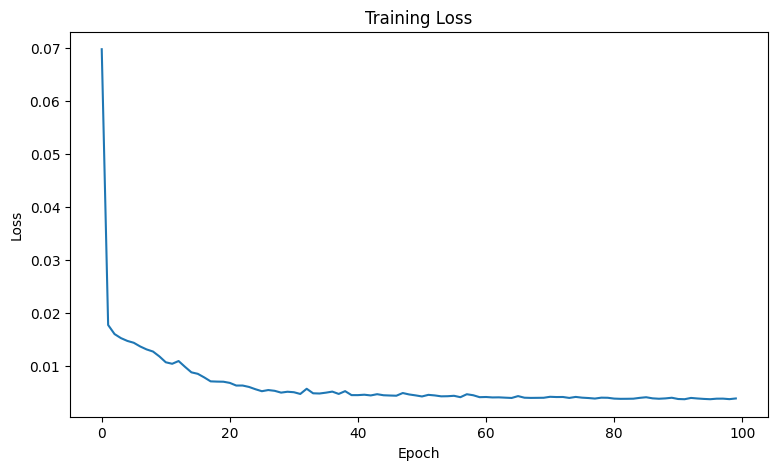

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
# Lấy dữ liệu cuối cùng trong tập dữ liệu huấn luyện để dự đoán ngày tiếp theo
last_sequence = X_train[-1]
predicted_temperatures = []

for _ in range(30):
    prediction = model.predict(last_sequence.reshape(1, window_size, len(features)))

    predicted_temperature = prediction[0][0]
    predicted_temperatures.append(predicted_temperature)

    # Cập nhật chuỗi dữ liệu cuối cùng để dự đoán ngày tiếp theo
    last_sequence = np.roll(last_sequence, -1, axis=0)  # Đẩy các giá trị sang trái

    last_sequence[-1] = predicted_temperature

print("Predicted Max Temperatures for the Next 30 Days:", predicted_temperatures)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

In [ ]:
# Đảo chuẩn hóa kết quả dự đoán trở lại thành đơn vị thực tế
import sklearn
convert = sklearn.preprocessing.MinMaxScaler()
data_maxtemp = data['mintemp'].values.reshape(-1,1)
convert.fit_transform(data_maxtemp)

predicted_temperatures = np.array(predicted_temperatures).reshape(-1, 1)
predicted = convert.inverse_transform(predicted_temperatures)
predicted

array([[25.082441],
       [24.90412 ],
       [24.957413],
       [24.906   ],
       [24.674469],
       [24.346874],
       [23.992033],
       [23.644735],
       [23.37651 ],
       [23.183578],
       [23.034147],
       [22.905346],
       [22.787636],
       [22.67921 ],
       [22.581102],
       [22.49484 ],
       [22.420542],
       [22.356836],
       [22.301815],
       [22.253819],
       [22.211658],
       [22.17455 ],
       [22.141937],
       [22.11336 ],
       [22.08836 ],
       [22.0665  ],
       [22.047367],
       [22.030611],
       [22.015928],
       [22.003048]], dtype=float32)

In [ ]:
df = pd.DataFrame({
    'FutureMinTemp': predicted.flatten(),
})

# Lưu DataFrame vào tệp
df.to_csv('/data/predict/FutureMintemp_V.csv', index=False)
print("Đã lưu dữ liệu vào file FutureMintemp_V.csv")

Đã lưu dữ liệu vào file FutureMintemp_DAV.csv


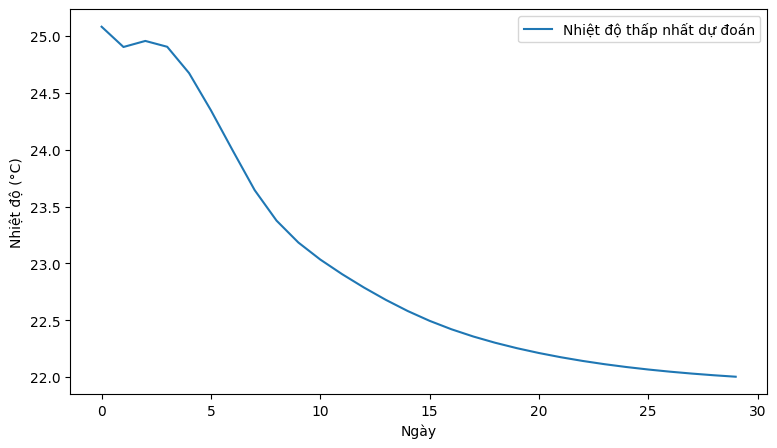

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(predicted[:,0], label='Nhiệt độ thấp nhất dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ (°C)')
plt.legend()
plt.show()